In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set(style = "whitegrid",font_scale = 1.5)
%matplotlib inline
plt.rcParams['figure.figsize']=[12,8]

### Sensor DF

In [3]:
sensor_df = pd.read_csv('data/sensor.csv')

In [4]:
sensor_df.head()

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [5]:
sensor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 55 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      220320 non-null  int64  
 1   timestamp       220320 non-null  object 
 2   sensor_00       210112 non-null  float64
 3   sensor_01       219951 non-null  float64
 4   sensor_02       220301 non-null  float64
 5   sensor_03       220301 non-null  float64
 6   sensor_04       220301 non-null  float64
 7   sensor_05       220301 non-null  float64
 8   sensor_06       215522 non-null  float64
 9   sensor_07       214869 non-null  float64
 10  sensor_08       215213 non-null  float64
 11  sensor_09       215725 non-null  float64
 12  sensor_10       220301 non-null  float64
 13  sensor_11       220301 non-null  float64
 14  sensor_12       220301 non-null  float64
 15  sensor_13       220301 non-null  float64
 16  sensor_14       220299 non-null  float64
 17  sensor_15 

### Data cleaning

In [6]:
# No values for sensor 15 and unnamed column is unnecessary
sensor_df.drop(['sensor_15','Unnamed: 0'],inplace = True,axis=1)
sensor_df.head()

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [7]:
# Function that calculates the percentage of missing values
def calc_percent_NAs(df):
    nans = pd.DataFrame((df.isnull().sum().sort_values(ascending=False) / len(df)) * 100, columns=['percent'])
    idx = nans['percent'] > 0
    return nans[idx]# Let's use above function to look at top ten columns with NaNs
calc_percent_NAs(sensor_df).head(10)

,percent
sensor_50,34.956881
sensor_51,6.982117
sensor_00,4.633261
sensor_07,2.474129
sensor_08,2.317992
sensor_06,2.177741
sensor_09,2.085603
sensor_01,0.167484
sensor_30,0.118464
sensor_29,0.032680


In [8]:
# Too many missing values in sensor 50 , so dropping that
sensor_df.drop('sensor_50',inplace = True,axis=1)
sensor_df.head()

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_51,machine_status
0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,201.3889,NORMAL
1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,201.3889,NORMAL
2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,...,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,203.7037,NORMAL
3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,...,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,203.1250,NORMAL
4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,...,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,201.3889,NORMAL


In [9]:
# Convert time to index
sensor_df['index'] = pd.to_datetime(sensor_df['timestamp'])
sensor_df.index = sensor_df['index']

In [10]:
#Drop index and timestamp columns
sensor_df.drop(['index','timestamp'],inplace = True,axis=1)
sensor_df.head()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_51,machine_status
index,,,,,,,,,,,,,,,,,,,,,
2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,201.3889,NORMAL
2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,201.3889,NORMAL
2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,...,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,203.7037,NORMAL
2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,...,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,203.1250,NORMAL
2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,...,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,201.3889,NORMAL


### Dealing with missing values

In [11]:
#imputing missing values with mean
sensor_df.fillna(sensor_df.mean(),inplace= True)
sensor_df.isnull().sum()

sensor_00         0
sensor_01         0
sensor_02         0
sensor_03         0
sensor_04         0
sensor_05         0
sensor_06         0
sensor_07         0
sensor_08         0
sensor_09         0
sensor_10         0
sensor_11         0
sensor_12         0
sensor_13         0
sensor_14         0
sensor_16         0
sensor_17         0
sensor_18         0
sensor_19         0
sensor_20         0
sensor_21         0
sensor_22         0
sensor_23         0
sensor_24         0
sensor_25         0
sensor_26         0
sensor_27         0
sensor_28         0
sensor_29         0
sensor_30         0
sensor_31         0
sensor_32         0
sensor_33         0
sensor_34         0
sensor_35         0
sensor_36         0
sensor_37         0
sensor_38         0
sensor_39         0
sensor_40         0
sensor_41         0
sensor_42         0
sensor_43         0
sensor_44         0
sensor_45         0
sensor_46         0
sensor_47         0
sensor_48         0
sensor_49         0
sensor_51         0


### EDA

In [12]:
sensor_df.machine_status.value_counts()

NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: machine_status, dtype: int64

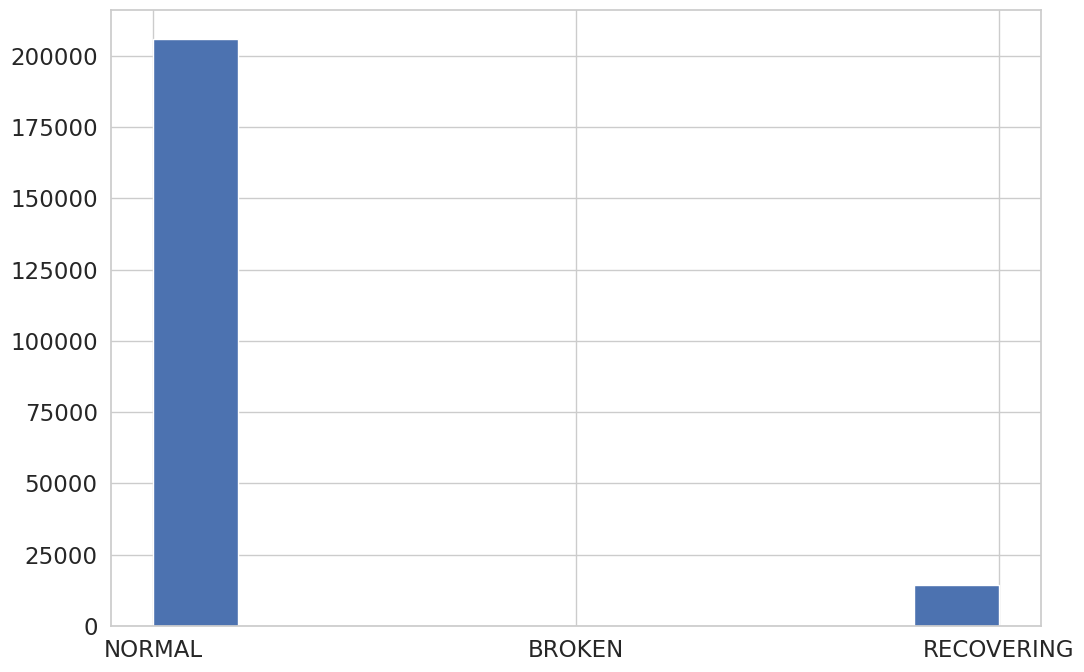

In [14]:
plt.hist(sensor_df.machine_status)
plt.show()

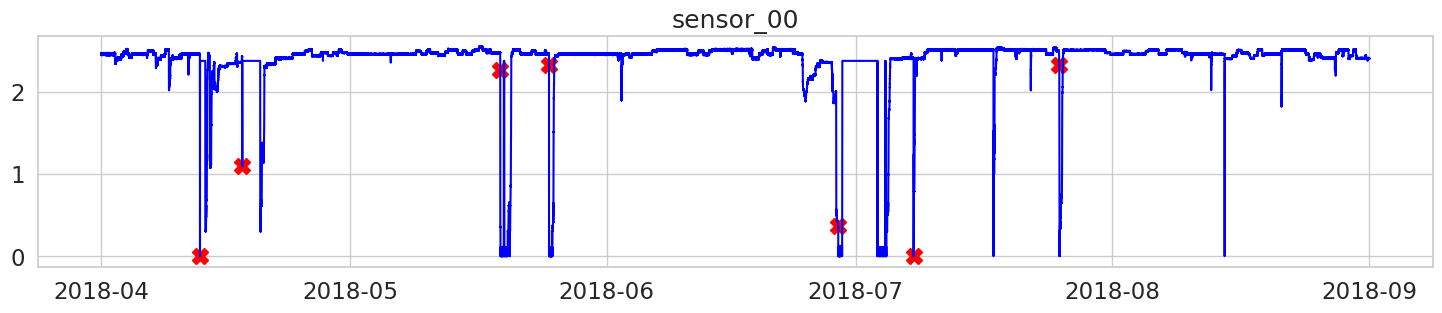

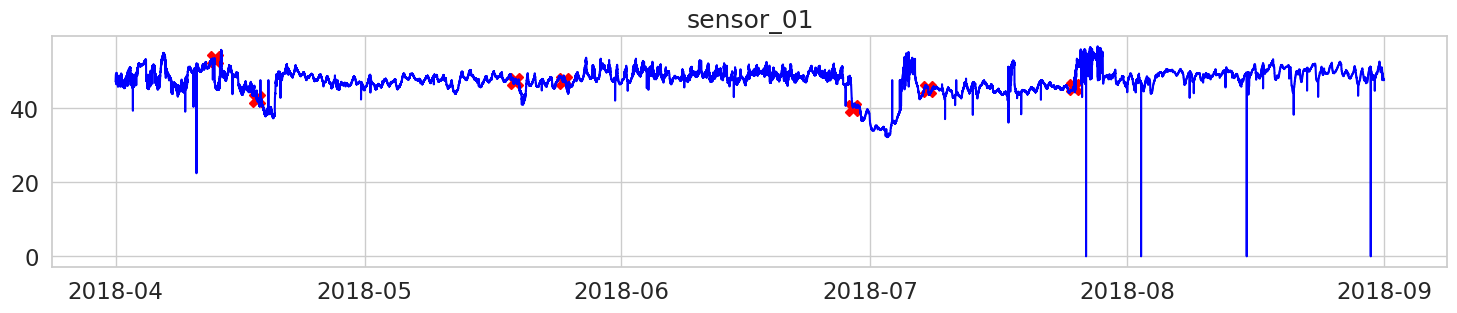

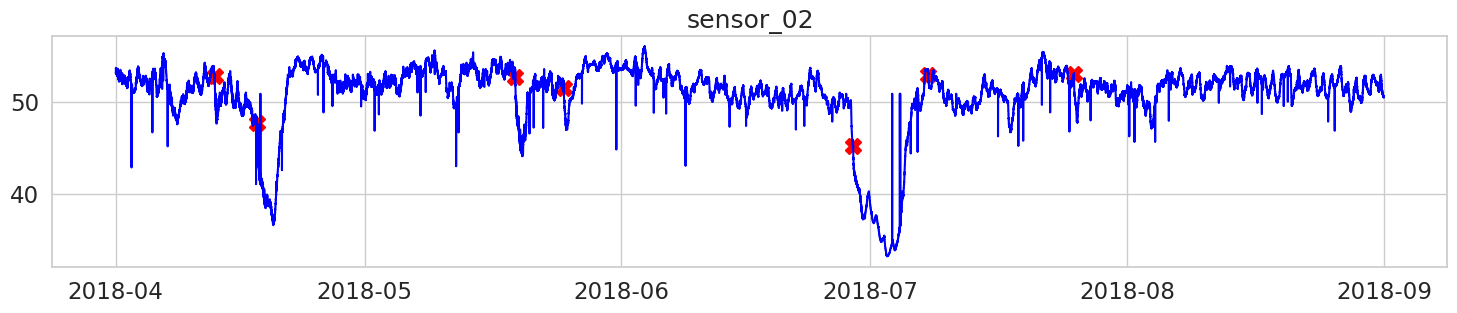

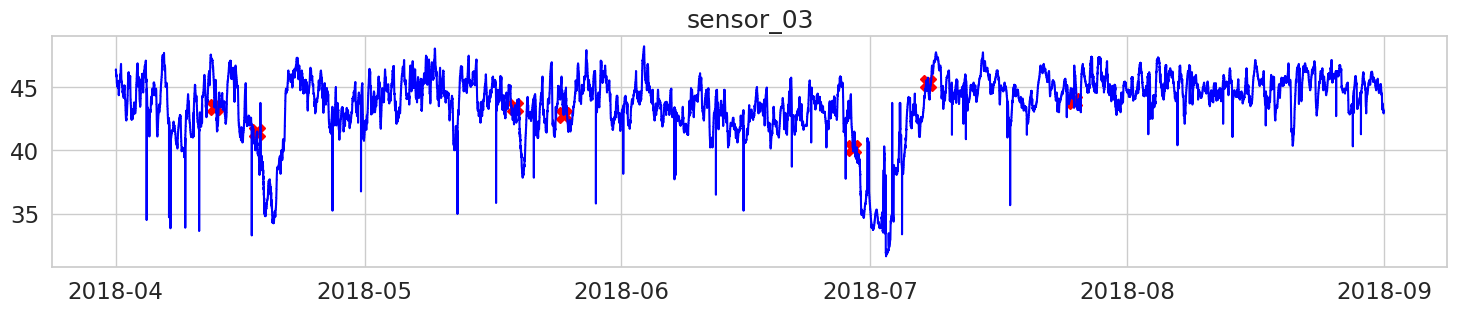

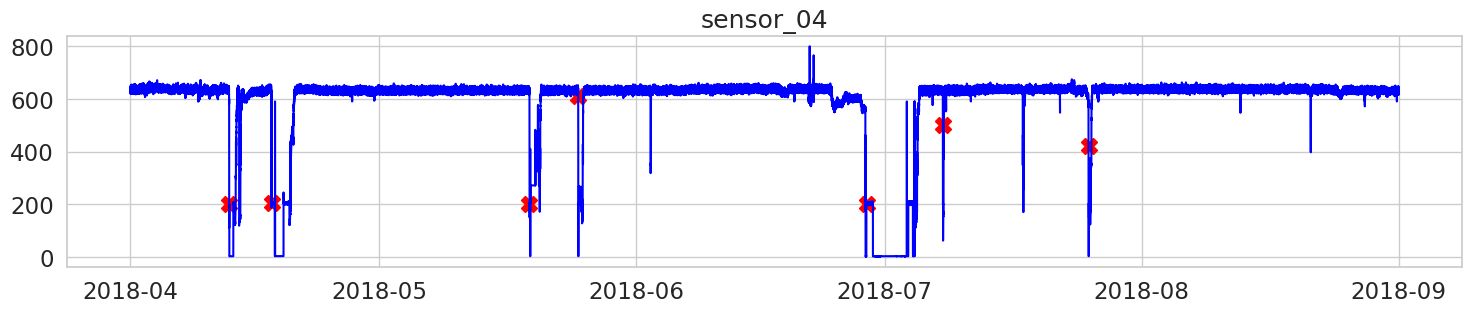

In [15]:
#extract the readings from the Broken state of the pump
broken= sensor_df[sensor_df['machine_status']=='BROKEN']

#Extract the name of the numerical columns
sensor_df_2 = sensor_df.drop(['machine_status'],axis=1)
names= sensor_df_2.columns[:5]

#plot timeseries for five sensors with Broken state marked with X in red color

for name in names:
    _=plt.figure(figsize=(18,3))
    _=plt.plot(broken[name],linestyle='none',marker='X',color='red',markersize=12)
    _=plt.plot(sensor_df[name],color='blue')
    _=plt.title(name)
    plt.show()

### Data preprocessing and dimensionality reduction

### Scaling the data

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
#dropping the target column from the dataframe
sensor_df_2 = sensor_df.drop('machine_status',axis=1)
col_names=sensor_df_2.columns

#scaling
scaler=StandardScaler()
sensor_df_2_scaled= scaler.fit_transform(sensor_df_2)
sensor_df_2_scaled = pd.DataFrame(sensor_df_2_scaled,columns=col_names)

In [18]:
sensor_df_2_scaled.head()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_51
0,0.231450,-0.151675,0.639386,1.057675,0.303443,0.177097,-0.042091,0.132586,0.181964,0.122858,...,-0.553995,-0.358970,-0.176799,-0.260520,1.759633,0.185888,-0.588642,0.086297,0.553138,-0.012402
1,0.231450,-0.151675,0.639386,1.057675,0.303443,0.177097,-0.042091,0.132586,0.181964,0.122858,...,-0.553995,-0.358970,-0.176799,-0.260520,1.759633,0.185888,-0.588642,0.086297,0.553138,-0.012402
2,0.180129,-0.072613,0.639386,1.093565,0.334786,0.008647,-0.082656,0.089329,0.207112,0.101892,...,-0.619939,-0.358970,-0.200379,-0.285516,1.737092,0.204388,-0.588641,0.061668,0.522906,0.009499
3,0.219228,-0.151675,0.627550,1.093564,0.260045,0.207693,-0.086035,0.185835,0.246628,0.136839,...,-0.619939,-0.384354,-0.271121,-0.310513,1.692010,0.204388,-0.588642,0.061668,0.507790,0.004024
4,0.182573,-0.138499,0.639386,1.093564,0.317909,0.184568,-0.069133,0.169195,0.246628,0.136839,...,-0.553995,-0.384354,-0.223959,-0.335509,1.714550,0.241389,-0.533219,0.089816,0.492674,-0.012402


### Principal Component Analysis

In [19]:
from sklearn.decomposition import PCA

In [20]:
pca = PCA()
pca.fit(sensor_df_2_scaled)

PCA()

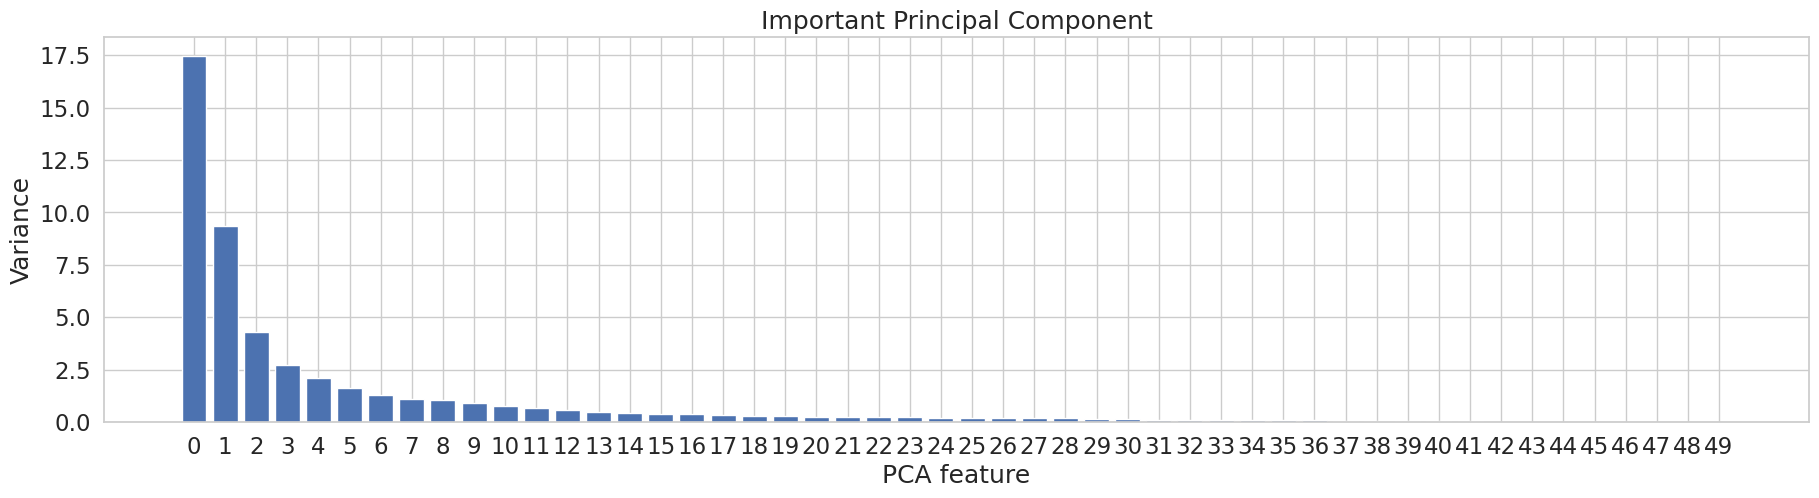

In [21]:
#plot the principal components
features = range(pca.n_components_)
_=plt.figure(figsize=(22,5))
_=plt.bar(features,pca.explained_variance_)
_=plt.xlabel('PCA feature')
_=plt.ylabel('Variance')
_=plt.xticks(features)
_=plt.title('Important Principal Component')
plt.show()

In [22]:
#calculate PCA with 2 components
pca = PCA(n_components=2)
pComponents = pca.fit_transform(sensor_df_2_scaled)
principal_df = pd.DataFrame(data = pComponents,columns=['pca1','pca2'])

In [23]:
principal_df.head()

,pca1,pca2
0,-0.046056,0.490524
1,-0.046056,0.490524
2,-0.186309,0.500354
3,-0.186651,0.538034
4,-0.142655,0.645878


### Stationarity & Autocorrelation

In [24]:
#Stationarity

from statsmodels.tsa.stattools import adfuller

In [ ]:
#run Augmented Dickey Fuller Test
result = adfuller(principal_df['pca1'])

#print p-value
print(result[1])

In [28]:
#autocorrelation

#compute change in daily mean
pca1= principal_df['pca1'].pct_change()

#Compute Autocorelation
autocorr = pca1.dropna().autocorr()
print('Autocorrelation is:',autocorr)

Autocorrelation is: -7.216171624013355e-06


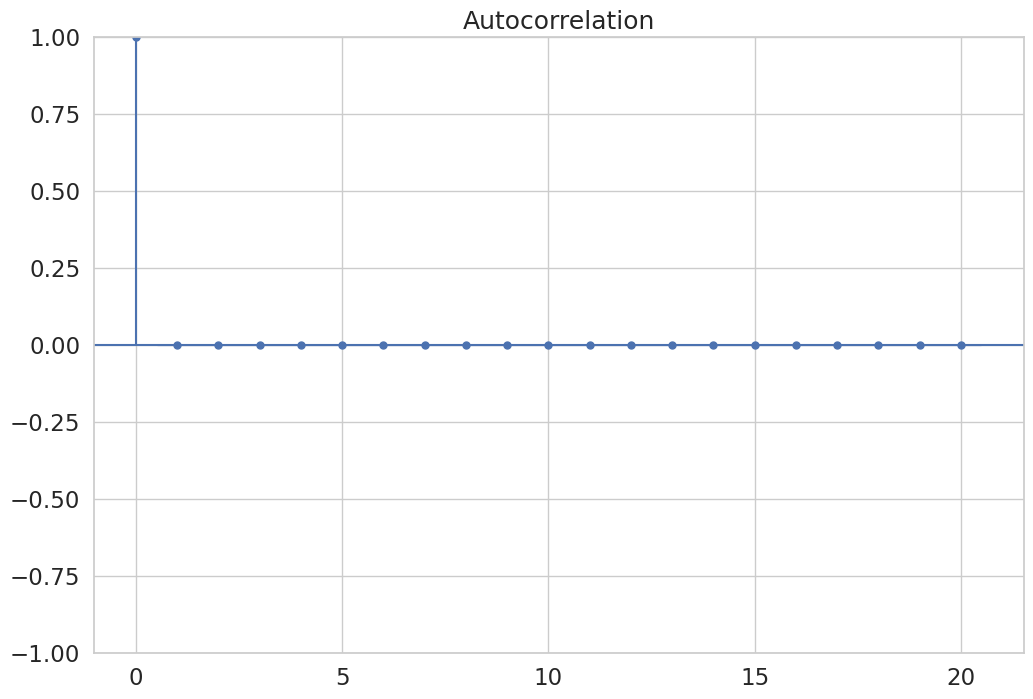

In [27]:
#plot ACF
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(pca1.dropna(),lags=20,alpha=0.05)
plt.show()

### Modeling

### Model-1 - K-Means Clusting

In [30]:
from sklearn.cluster import KMeans

In [31]:
kmeans = KMeans(n_clusters=2,random_state=13)
kmeans.fit(principal_df.values)

KMeans(n_clusters=2, random_state=13)

In [32]:
labels = kmeans.predict(principal_df.values)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f535e32a310>
Traceback (most recent call last):
  File "/home/zobby/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/zobby/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/zobby/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/zobby/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


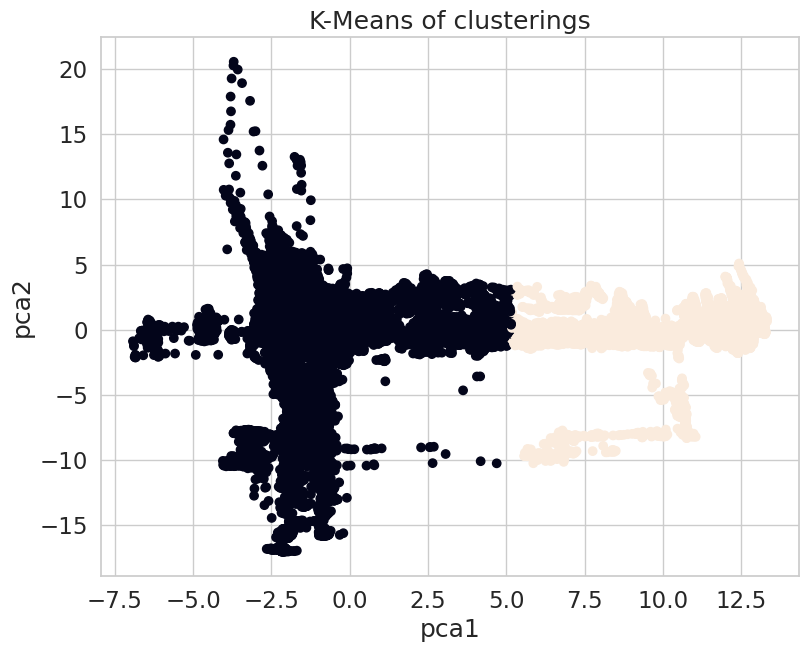

In [33]:
#plotting the clusters
_=plt.figure(figsize=(9,7))
_=plt.scatter(principal_df['pca1'],principal_df['pca2'],c=labels)
_=plt.xlabel('pca1')
_=plt.ylabel('pca2')
_=plt.title('K-Means of clusterings')
plt.show()

In [34]:
def getDistanceByPoint(data, model):
    """ Function that calculates the distance between a point and centroid of a cluster, 
            returns the distances in pandas series"""
    distance = []
    for i in range(0,len(data)):
        Xa = np.array(data.loc[i])
        Xb = model.cluster_centers_[model.labels_[i]-1]
        distance.append(np.linalg.norm(Xa-Xb))
    return pd.Series(distance, index=data.index)

In [35]:
# Assume that 13% of the entire data set are anomalies 
outliers_fraction = 0.13

# get the distance between each point and its nearest centroid. 
# the biggest distances are considered as anomaly
distance = getDistanceByPoint(principal_df, kmeans)

# number of observations that equate to the 13% of the entire data set
number_of_outliers = int(outliers_fraction*len(distance))

# Take the minimum of the largest 13% of the distances as the threshold
threshold = distance.nlargest(number_of_outliers).min()

# anomaly1 contains the anomaly result of the above method Cluster (0:normal, 1:anomaly) 
principal_df['kmeans_anomaly'] = (distance >= threshold).astype(int)

In [36]:
principal_df.head()

,pca1,pca2,kmeans_anomaly
0,-0.046056,0.490524,0
1,-0.046056,0.490524,0
2,-0.186309,0.500354,0
3,-0.186651,0.538034,0
4,-0.142655,0.645878,0


In [38]:
# 0:normal, 1:anomaly
principal_df["kmeans_anomaly"].value_counts()

0    191679
1     28641
Name: kmeans_anomaly, dtype: int64

In [39]:
dfBroken = sensor_df[sensor_df["machine_status"]=="BROKEN"]

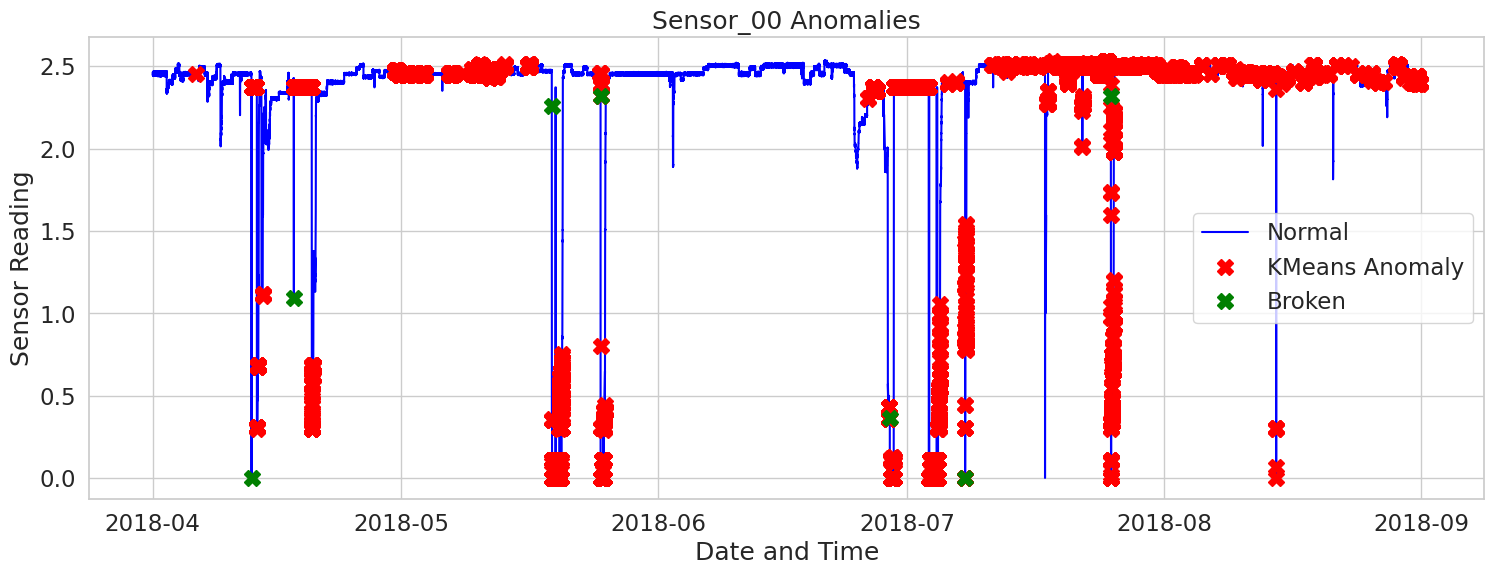

In [40]:
sensor_df['kmeans_anomaly'] = pd.Series(principal_df['kmeans_anomaly'].values, index=sensor_df.index)
a = sensor_df[sensor_df['kmeans_anomaly'] == 1] #anomaly
_ = plt.figure(figsize=(18,6))
_ = plt.plot(sensor_df['sensor_00'], color='blue', label='Normal')
_ = plt.plot(a['sensor_00'], linestyle='none', marker='X', color='red', markersize=12, label='KMeans Anomaly')
_ = plt.plot(dfBroken['sensor_00'], linestyle='none', marker='X', color='green', markersize=12, label='Broken')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Sensor Reading')
_ = plt.title('Sensor_00 Anomalies')
_ = plt.legend(loc='best')
plt.show()

### Model 2 - Isolation Forest

In [41]:
from sklearn.ensemble import IsolationForest

In [42]:
model_if =  IsolationForest(random_state=13)

model_if.fit(principal_df.drop('kmeans_anomaly', axis = 1)) 

principal_df['if_anomaly'] = pd.Series(model_if.predict(principal_df.drop('kmeans_anomaly', axis = 1)))

In [44]:
# 1:normal, -1:anomaly 
principal_df['if_anomaly'].value_counts()

 1    172555
-1     47765
Name: if_anomaly, dtype: int64

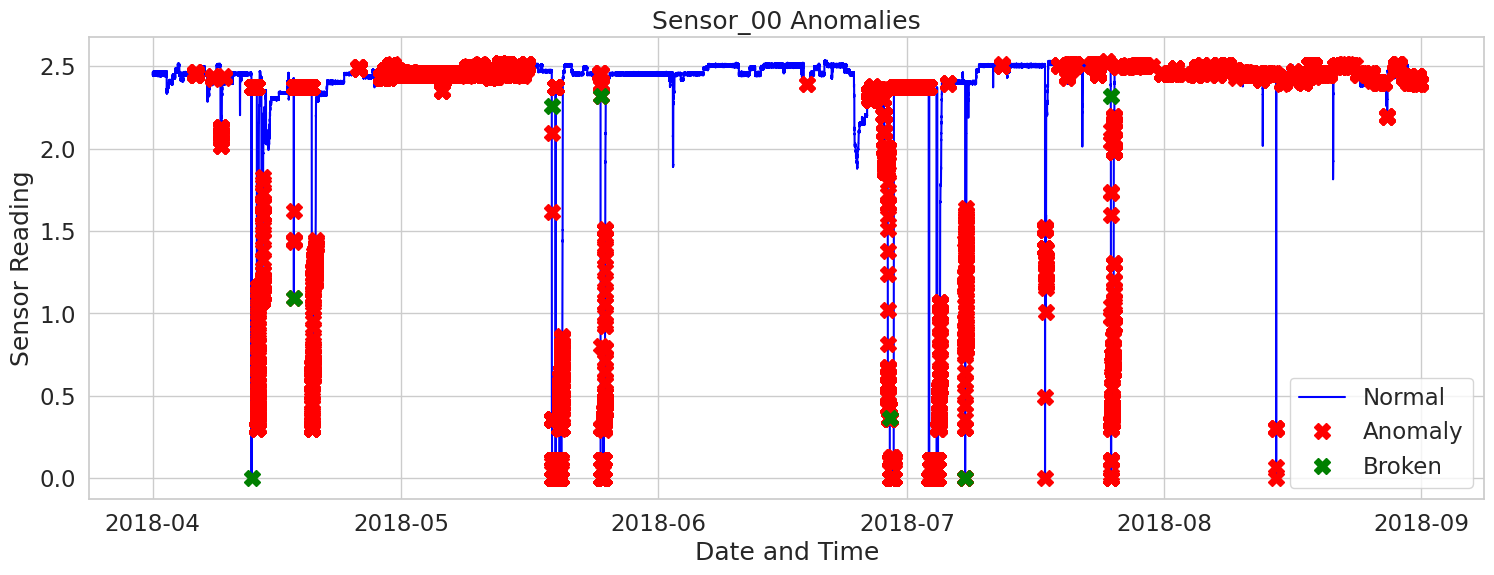

In [45]:
sensor_df['if_anomaly'] = pd.Series(principal_df['if_anomaly'].values, index=sensor_df.index)
a = sensor_df[sensor_df['if_anomaly'] == -1] #anomaly
_ = plt.figure(figsize=(18,6))
_ = plt.plot(sensor_df['sensor_00'], color='blue', label='Normal')
_ = plt.plot(a['sensor_00'], linestyle='none', marker='X', color='red', markersize=12, label='Anomaly')
_ = plt.plot(dfBroken['sensor_00'], linestyle='none', marker='X', color='green', markersize=12, label='Broken')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Sensor Reading')
_ = plt.title('Sensor_00 Anomalies')
_ = plt.legend(loc='best')
plt.show();

### Model 3 - One Class SVM

In [46]:
from sklearn.svm import OneClassSVM

In [47]:
# nu = 0.13 means that the algorithm will designate 13% data as outliers
model_one_cl_svm = OneClassSVM(kernel = 'rbf', gamma = 0.001, nu = 0.13)
model_one_cl_svm.fit(principal_df.drop(['kmeans_anomaly', 'if_anomaly'], axis = 1))

principal_df['one_cl_svm_anomaly'] = pd.Series(model_one_cl_svm.predict(principal_df.drop(['kmeans_anomaly', 'if_anomaly'], axis = 1)))

In [48]:
# 1:normal, -1:anomaly 
principal_df['one_cl_svm_anomaly'].value_counts()

 1    191679
-1     28641
Name: one_cl_svm_anomaly, dtype: int64

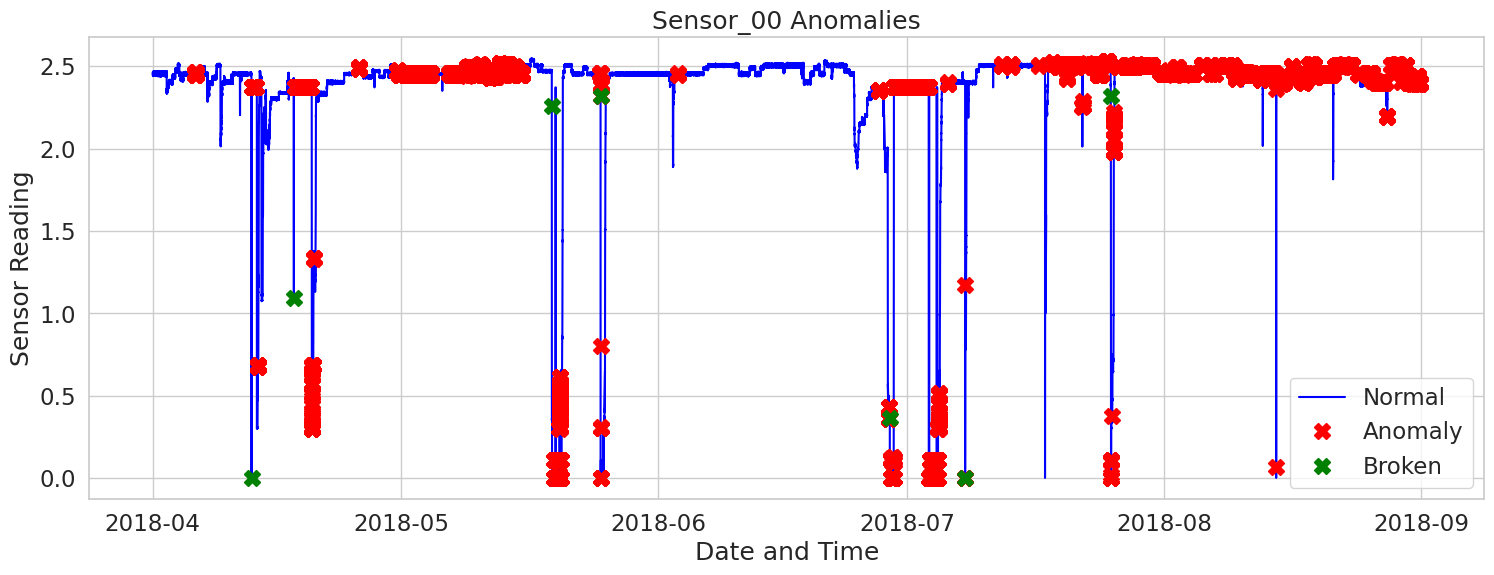

In [49]:
sensor_df['one_cl_svm_anomaly'] = pd.Series(principal_df['one_cl_svm_anomaly'].values, index=sensor_df.index)
a = sensor_df[sensor_df['one_cl_svm_anomaly'] == -1] #anomaly
_ = plt.figure(figsize=(18,6))
_ = plt.plot(sensor_df['sensor_00'], color='blue', label='Normal')
_ = plt.plot(a['sensor_00'], linestyle='none', marker='X', color='red', markersize=12, label='Anomaly')
_ = plt.plot(dfBroken['sensor_00'], linestyle='none', marker='X', color='green', markersize=12, label='Broken')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Sensor Reading')
_ = plt.title('Sensor_00 Anomalies')
_ = plt.legend(loc='best')
plt.show();

### Model 4 - LOF

In [50]:
from sklearn.neighbors import LocalOutlierFactor

In [51]:
model_lof = LocalOutlierFactor(n_neighbors = 50, metric = 'manhattan', contamination = 0.13)
principal_df['lof_anomaly'] = pd.Series(model_lof.fit_predict(principal_df))

In [53]:
# 1:normal, -1:anomaly 
principal_df['lof_anomaly'].value_counts()

 1    191678
-1     28642
Name: lof_anomaly, dtype: int64

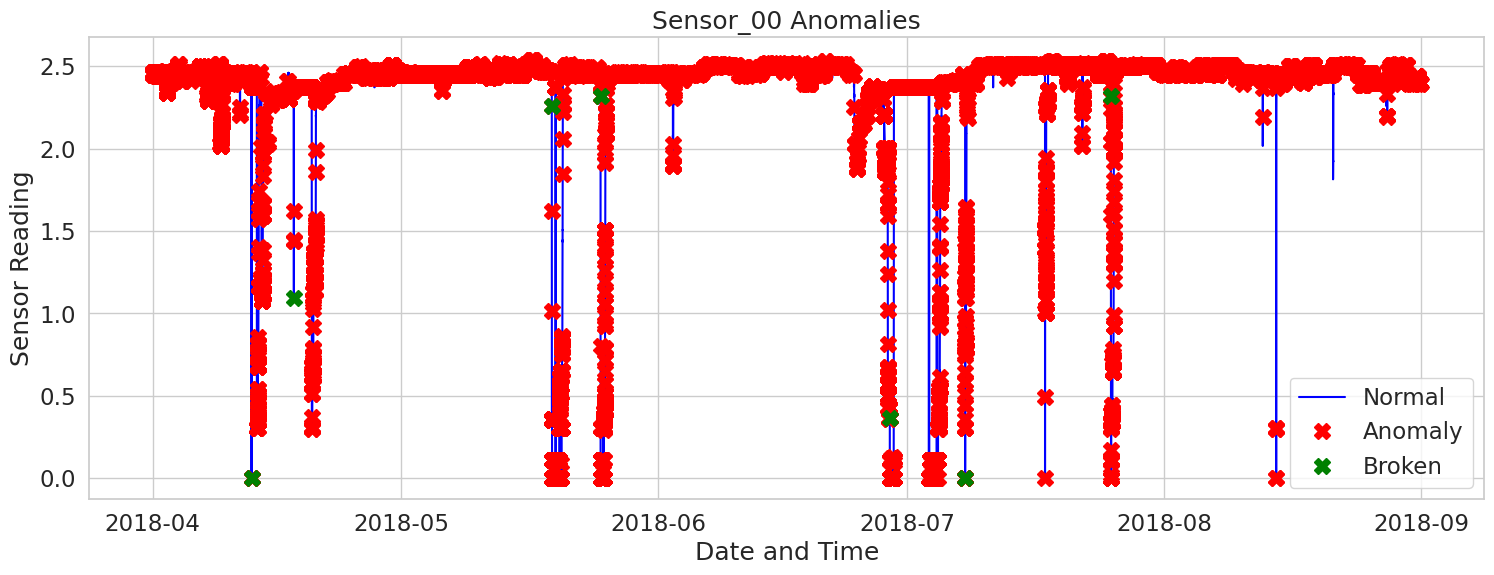

In [54]:
sensor_df['lof_anomaly'] = pd.Series(principal_df['lof_anomaly'].values, index=sensor_df.index)
a = sensor_df[sensor_df['lof_anomaly'] == -1] #anomaly
_ = plt.figure(figsize=(18,6))
_ = plt.plot(sensor_df['sensor_00'], color='blue', label='Normal')
_ = plt.plot(a['sensor_00'], linestyle='none', marker='X', color='red', markersize=12, label='Anomaly')
_ = plt.plot(dfBroken['sensor_00'], linestyle='none', marker='X', color='green', markersize=12, label='Broken')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Sensor Reading')
_ = plt.title('Sensor_00 Anomalies')
_ = plt.legend(loc='best')
plt.show();

### Plotting True Anomalies and Model Anomalies

In [56]:
principal_df['ground_truth_anomaly'] = (sensor_df['machine_status'] != 'NORMAL').reset_index().drop(['index'], axis=1).astype(int)
ground_truth_df = principal_df[principal_df['ground_truth_anomaly'] == 1]

kmeans_anomalies_df = principal_df[principal_df['kmeans_anomaly'] == 1]

if_df = principal_df[principal_df['if_anomaly'] == -1]

one_cl_svm_df = principal_df[principal_df['one_cl_svm_anomaly'] == -1]

lof_anomaly_df = principal_df[principal_df['lof_anomaly'] == -1]

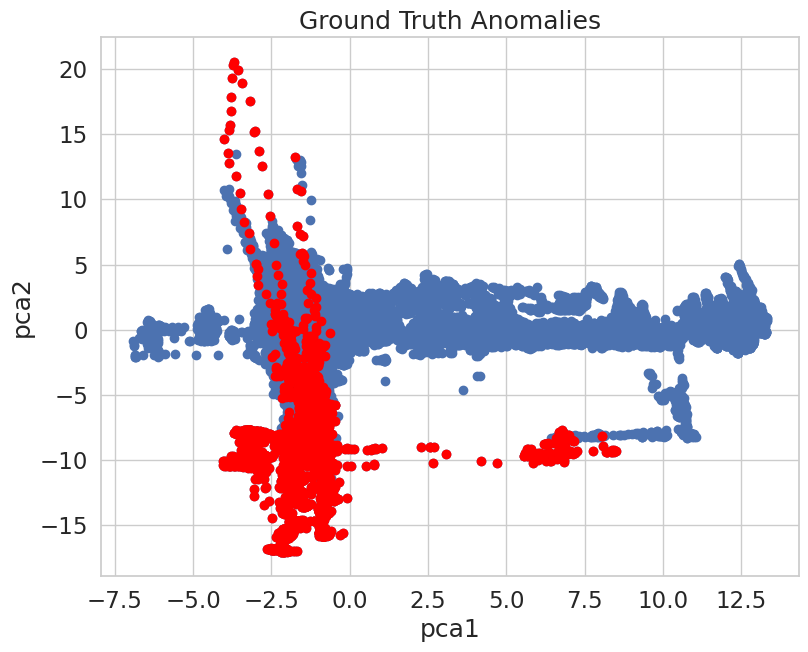

In [57]:
# Ground Truth
_=plt.figure(figsize=(9,7))
_=plt.scatter(principal_df['pca1'],principal_df['pca2'])
_=plt.scatter(ground_truth_df['pca1'],ground_truth_df['pca2'], color='red')
_=plt.xlabel('pca1')
_=plt.ylabel('pca2')
_=plt.title('Ground Truth Anomalies')
plt.show()

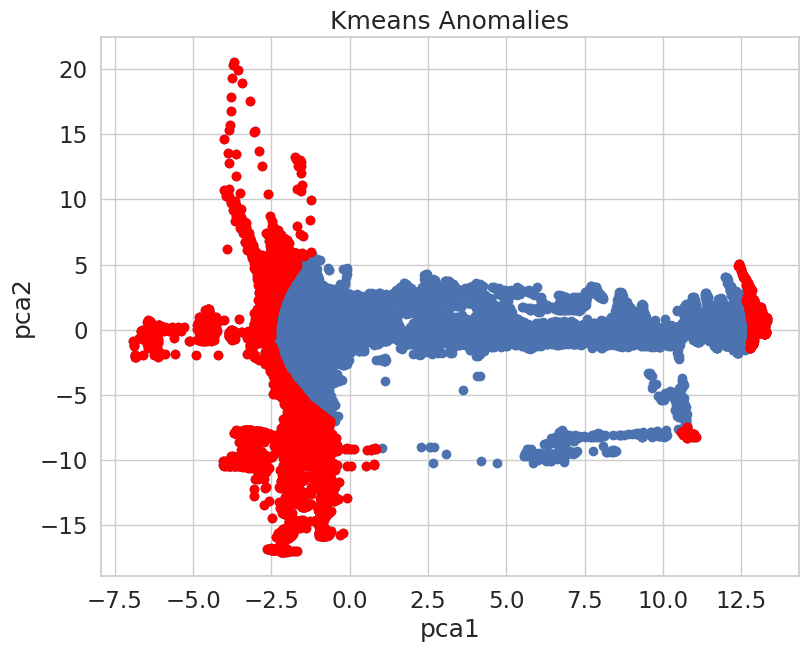

In [58]:
# Kmeans
_=plt.figure(figsize=(9,7))
_=plt.scatter(principal_df['pca1'],principal_df['pca2'])
_=plt.scatter(kmeans_anomalies_df['pca1'],kmeans_anomalies_df['pca2'], color='red')
_=plt.xlabel('pca1')
_=plt.ylabel('pca2')
_=plt.title('Kmeans Anomalies')
plt.show()

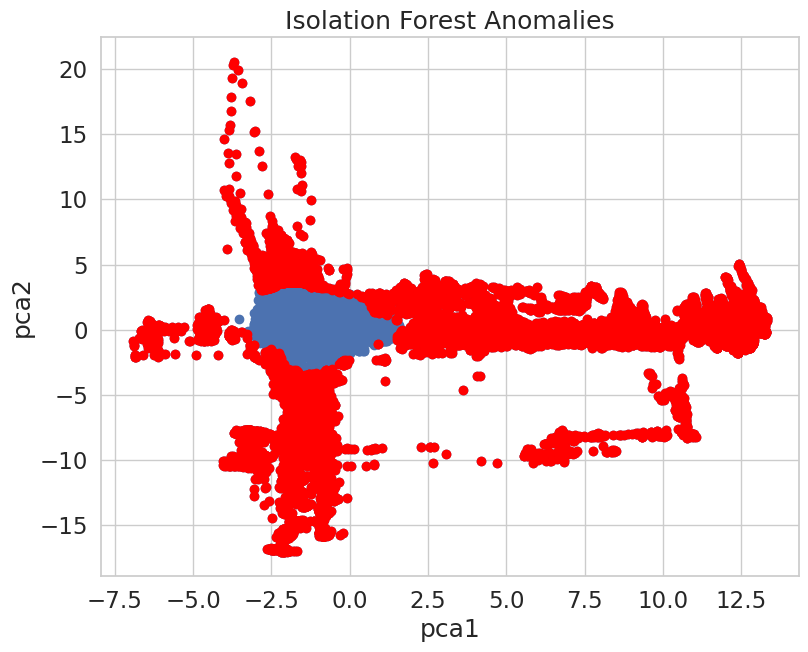

In [59]:
# Isolation Forest
_=plt.figure(figsize=(9,7))
_=plt.scatter(principal_df['pca1'],principal_df['pca2'])
_=plt.scatter(if_df['pca1'],if_df['pca2'], color='red')
_=plt.xlabel('pca1')
_=plt.ylabel('pca2')
_=plt.title('Isolation Forest Anomalies')
plt.show()

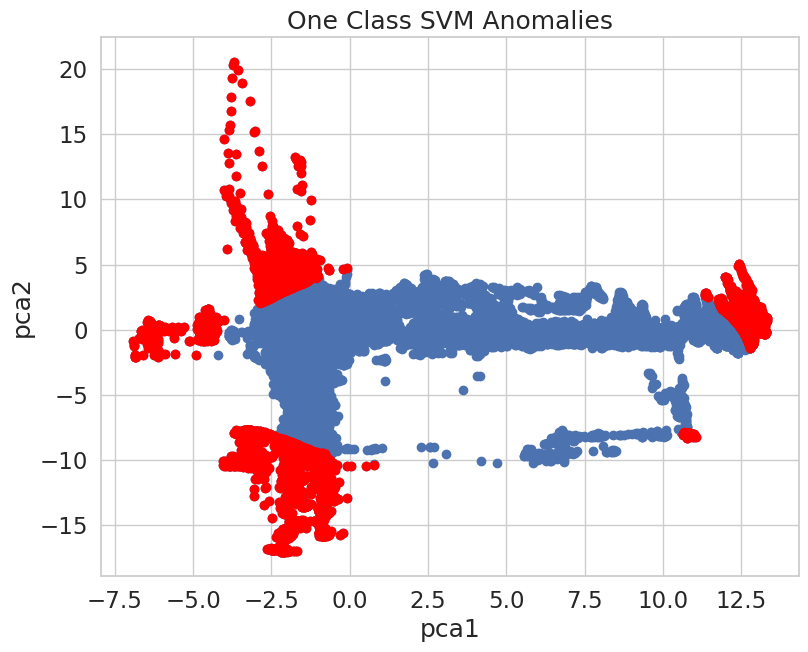

In [60]:
# One Class SVM
_=plt.figure(figsize=(9,7))
_=plt.scatter(principal_df['pca1'],principal_df['pca2'])
_=plt.scatter(one_cl_svm_df['pca1'],one_cl_svm_df['pca2'], color='red')
_=plt.xlabel('pca1')
_=plt.ylabel('pca2')
_=plt.title('One Class SVM Anomalies')
plt.show()

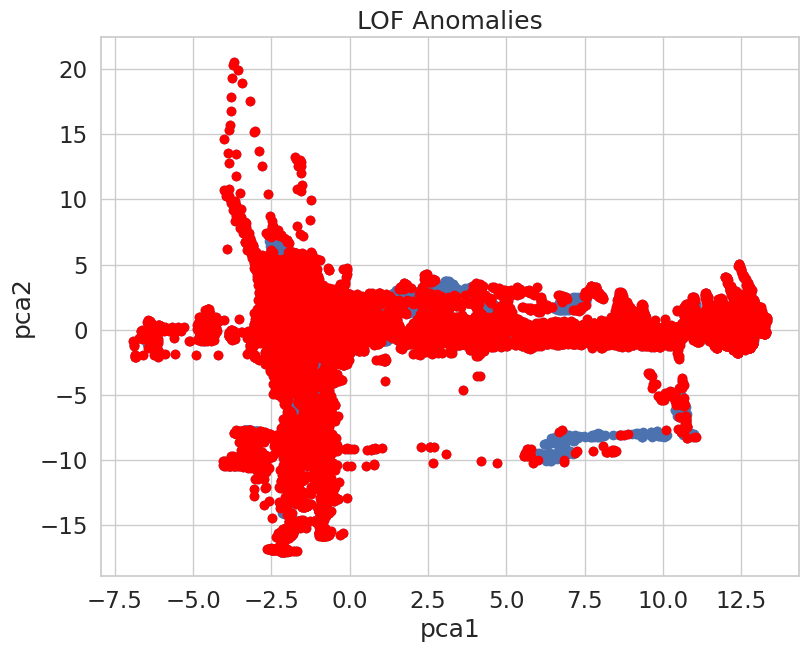

In [61]:
# LOF
_=plt.figure(figsize=(9,7))
_=plt.scatter(principal_df['pca1'],principal_df['pca2'])
_=plt.scatter(lof_anomaly_df['pca1'],lof_anomaly_df['pca2'], color='red')
_=plt.xlabel('pca1')
_=plt.ylabel('pca2')
_=plt.title('LOF Anomalies')
plt.show()

### Evaluation

In [62]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, RocCurveDisplay

In [63]:
predictions = sensor_df[['machine_status', 'kmeans_anomaly', 'if_anomaly', 'one_cl_svm_anomaly', 'lof_anomaly']]

In [64]:
# if anomaly uniformity. 1 is 0 and -1 is 1
predictions.loc[predictions["if_anomaly"] == 1, "if_anomaly"] = 0
predictions.loc[predictions["if_anomaly"] == -1, "if_anomaly"] = 1

predictions.loc[predictions["one_cl_svm_anomaly"] == 1, "one_cl_svm_anomaly"] = 0
predictions.loc[predictions["one_cl_svm_anomaly"] == -1, "one_cl_svm_anomaly"] = 1

predictions.loc[predictions["lof_anomaly"] == 1, "lof_anomaly"] = 0
predictions.loc[predictions["lof_anomaly"] == -1, "lof_anomaly"] = 1

In [65]:
# turning machine status numerical
predictions["machine_status"] = predictions["machine_status"].map(
    {"NORMAL": 0, "RECOVERING": 1, "BROKEN": 1})

### K-Means Evaluation

In [66]:
print(classification_report(predictions['machine_status'].values, 
                            predictions['kmeans_anomaly'].values))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96    205836
           1       0.47      0.93      0.62     14484

    accuracy                           0.93    220320
   macro avg       0.73      0.93      0.79    220320
weighted avg       0.96      0.93      0.94    220320



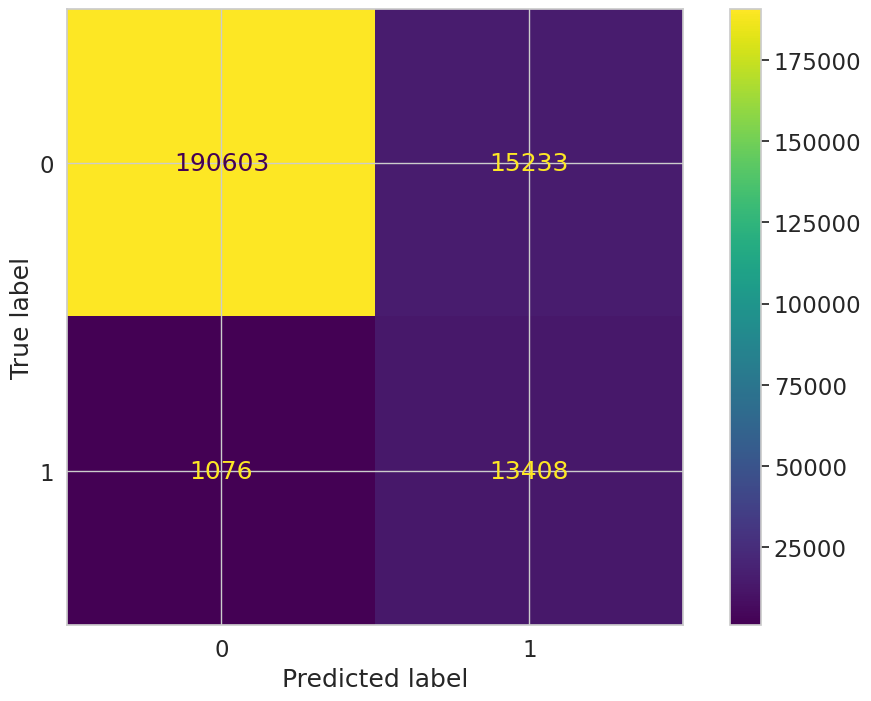

In [67]:
ConfusionMatrixDisplay.from_predictions(predictions['machine_status'].values,
                                        predictions['kmeans_anomaly'].values)
plt.show()

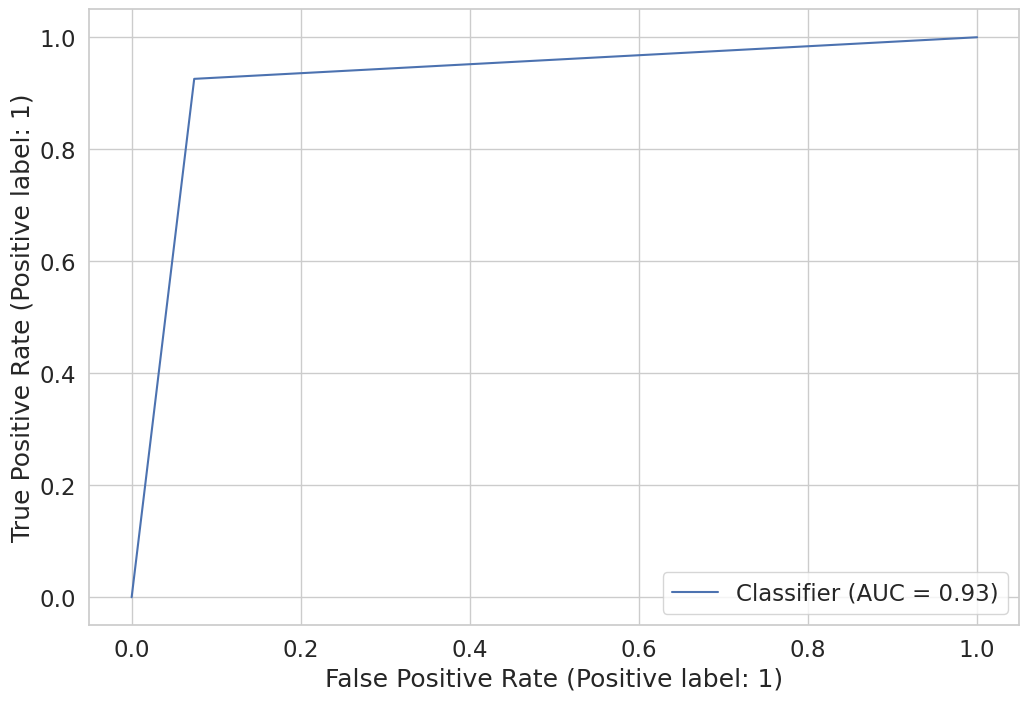

In [68]:
RocCurveDisplay.from_predictions(predictions['machine_status'], 
                                 predictions['kmeans_anomaly'])
plt.show()

### Isolation Forest Evaluation

In [69]:
print(classification_report(predictions['machine_status'], 
                            predictions['if_anomaly']))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91    205836
           1       0.30      0.98      0.46     14484

    accuracy                           0.85    220320
   macro avg       0.65      0.91      0.68    220320
weighted avg       0.95      0.85      0.88    220320



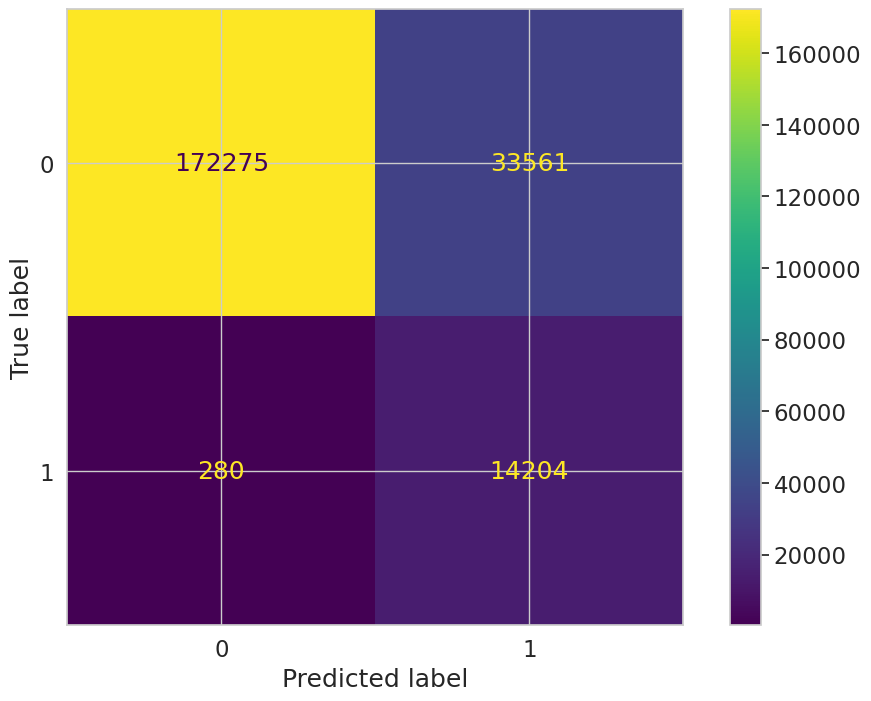

In [70]:
ConfusionMatrixDisplay.from_predictions(predictions['machine_status'], 
                                        predictions['if_anomaly'])
plt.show()

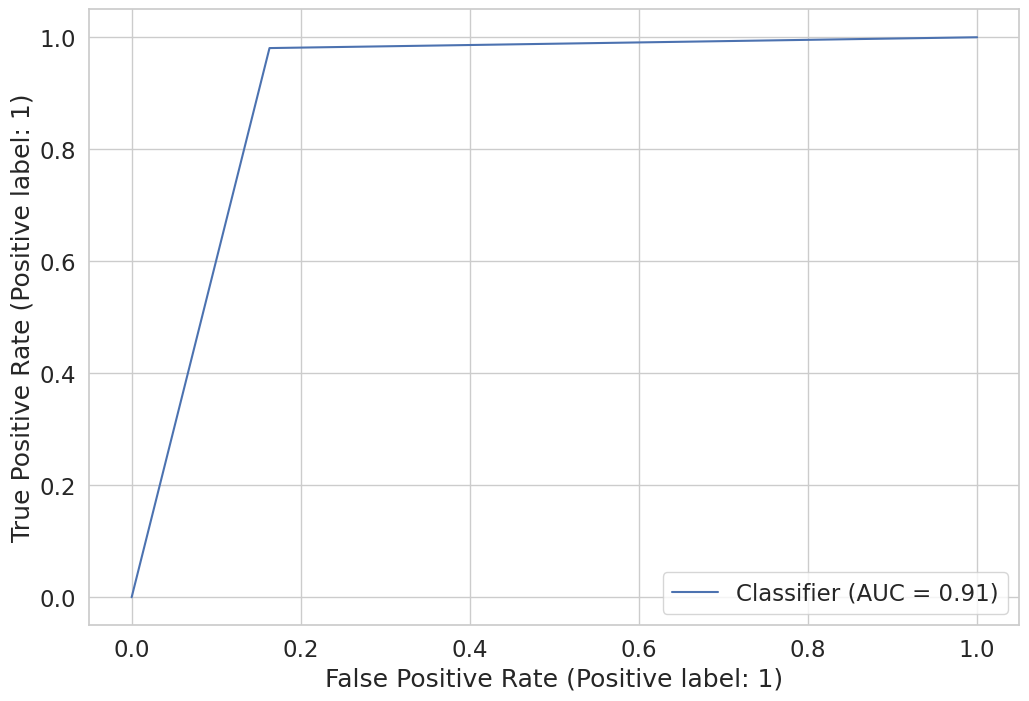

In [71]:
RocCurveDisplay.from_predictions(predictions['machine_status'], 
                                 predictions['if_anomaly'])
plt.show()

### One Class SVM Evaluation

In [72]:
print(classification_report(predictions['machine_status'], 
                            predictions['one_cl_svm_anomaly']))

              precision    recall  f1-score   support

           0       0.97      0.90      0.94    205836
           1       0.30      0.60      0.40     14484

    accuracy                           0.88    220320
   macro avg       0.64      0.75      0.67    220320
weighted avg       0.93      0.88      0.90    220320



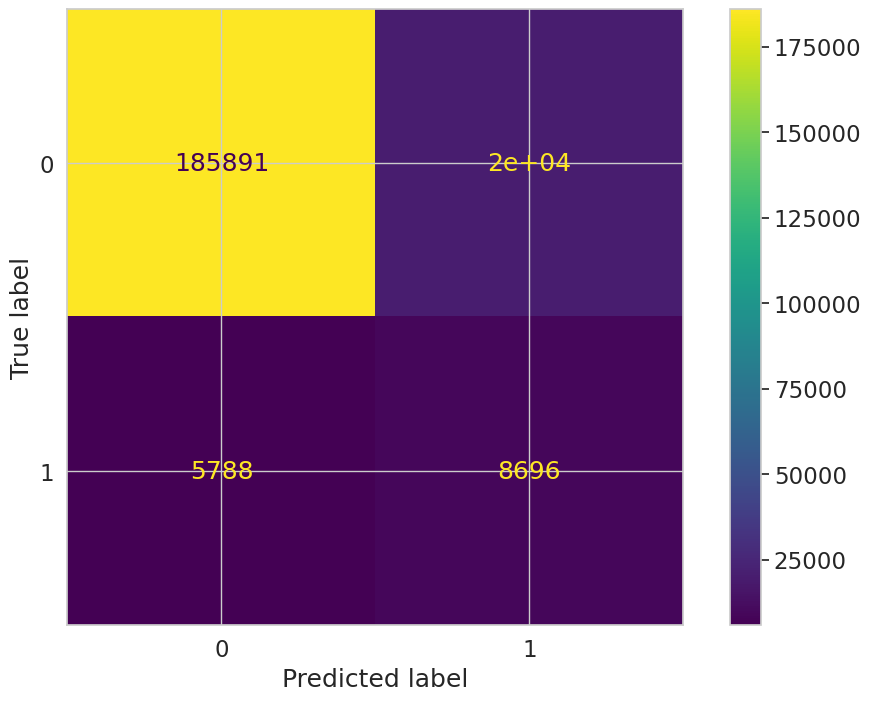

In [73]:
ConfusionMatrixDisplay.from_predictions(predictions['machine_status'].values,
                                        predictions['one_cl_svm_anomaly'].values)
plt.show()

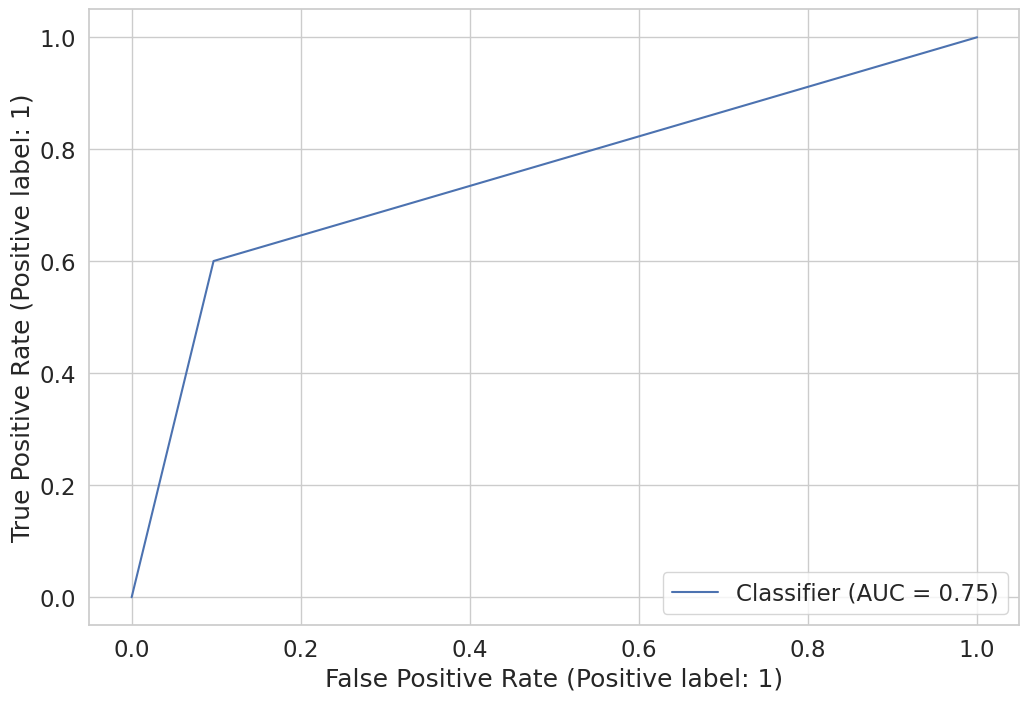

In [74]:
RocCurveDisplay.from_predictions(predictions['machine_status'], 
                                 predictions['one_cl_svm_anomaly'])
plt.show()

### LOF Evaluation

In [75]:
print(classification_report(predictions['machine_status'], 
                            predictions['lof_anomaly']))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92    205836
           1       0.23      0.45      0.30     14484

    accuracy                           0.86    220320
   macro avg       0.59      0.67      0.61    220320
weighted avg       0.91      0.86      0.88    220320



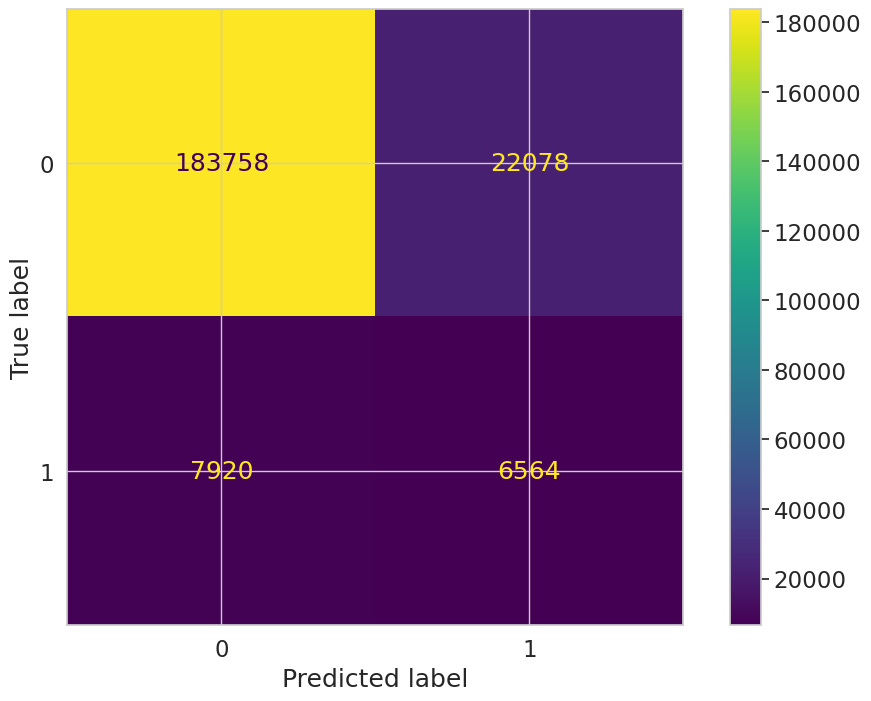

In [76]:
ConfusionMatrixDisplay.from_predictions(predictions['machine_status'].values,
                                        predictions['lof_anomaly'].values)
plt.show()

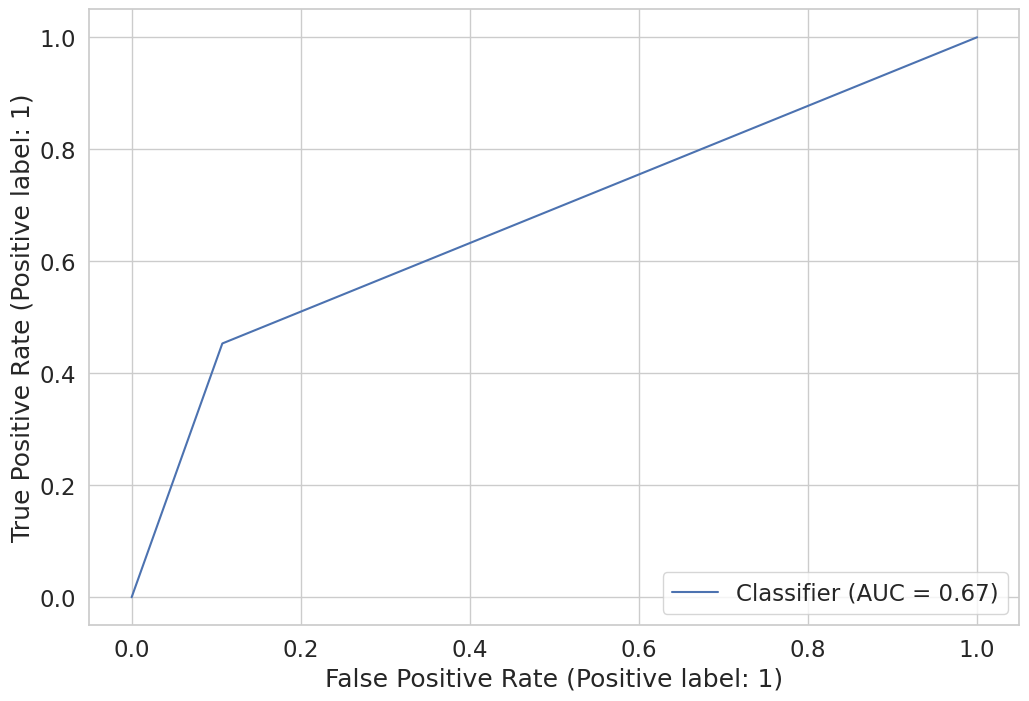

In [77]:
RocCurveDisplay.from_predictions(predictions['machine_status'], 
                                 predictions['lof_anomaly'])
plt.show()

### Hyperparameter tuning

In [78]:
n_neighbors = list(range(70, 151, 10))

metric = ['minkowski', 'manhattan']

contamination_range = []
contamination = 0.13

while contamination <= 0.2:
  contamination_range.append(round(contamination, 2))
  contamination += 0.01

In [79]:
import itertools

params_list = list(itertools.product(n_neighbors, metric, contamination_range))

In [80]:
temp_df = principal_df[['pca1', 'pca2']]
temp_df['machine_status'] = sensor_df['machine_status'].reset_index().drop(['index'], axis=1)
temp_df['machine_status'] = temp_df['machine_status'].map({"NORMAL": 1, "RECOVERING": -1, "BROKEN": -1})

lof_metrics = pd.DataFrame(columns=['n_neighbors', 'metric', 'contamination', 'precision', 'recall', 'f1-score', 'auc'])

In [82]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

for params in params_list:
  model_lof = LocalOutlierFactor(n_neighbors=params[0], metric=params[1], contamination=params[2])
  temp_df['lof_anomaly'] = pd.Series(model_lof.fit_predict(temp_df[['pca1', 'pca2']]))

  precision = precision_score(temp_df['machine_status'], temp_df['lof_anomaly'])
  recall = recall_score(temp_df['machine_status'], temp_df['lof_anomaly'])
  f1_metric = f1_score(temp_df['machine_status'], temp_df['lof_anomaly'])

  auc = roc_auc_score(temp_df['machine_status'], temp_df['lof_anomaly'])

  print('Precision score: {}'.format(precision))
  print('Recall score: {}'.format(recall))
  print('F1 score: {}'.format(f1_metric))
  print('AUC: {}'.format(auc))
  print('----------------------------')

  row = [params[0], params[1], params[2], precision, recall, f1_metric, auc]
  lof_metrics.loc[len(lof_metrics)] = row

Precision score: 0.960183223948497
Recall score: 0.894139023300103
F1 score: 0.9259849967548311
AUC: 0.6836063799184856
----------------------------
Precision score: 0.9607652724633857
Recall score: 0.8843982588079831
F1 score: 0.9210014393730507
AUC: 0.6855711260899899
----------------------------
Precision score: 0.9613449955145457
Recall score: 0.8746429196058998
F1 score: 0.9159467627216947
AUC: 0.6874250223547312
----------------------------
Precision score: 0.961743791471243
Recall score: 0.864707825647603
F1 score: 0.9106481386734339
AUC: 0.6879462906199904
----------------------------
Precision score: 0.9620485057282695
Recall score: 0.8546852834295264
F1 score: 0.9051944811050139
AUC: 0.6877679385940783
----------------------------
Precision score: 0.962288693803899
Recall score: 0.8445995841349424
F1 score: 0.8996113822063763
AUC: 0.6871092369721936
----------------------------
Precision score: 0.962450758997865
Recall score: 0.8344410112905419
F1 score: 0.8938862072106064
AU

In [83]:
best_n_neighbors, best_metric, best_contamination = lof_metrics.sort_values(by=['auc'], ascending=False).iloc[0][:3]

In [84]:
model_lof = LocalOutlierFactor(n_neighbors=best_n_neighbors, metric=best_metric, contamination=best_contamination)
principal_df['lof_anomaly'] = pd.Series(model_lof.fit_predict(principal_df[['pca1', 'pca2']]))

In [86]:
# 1:normal, -1:anomaly 
principal_df['lof_anomaly'].value_counts()

 1    182865
-1     37455
Name: lof_anomaly, dtype: int64

In [87]:
predictions = pd.DataFrame()
predictions['lof_anomaly'] = principal_df[['lof_anomaly']]
predictions['machine_status'] = sensor_df[['machine_status']].reset_index().drop(['index'], axis=1)

predictions['machine_status'] = predictions['machine_status'].map({"NORMAL": 0, "RECOVERING": 1, "BROKEN": 1})

predictions.loc[predictions["lof_anomaly"] == 1, "lof_anomaly"] = 0
predictions.loc[predictions["lof_anomaly"] == -1, "lof_anomaly"] = 1

In [88]:
print(classification_report(predictions['machine_status'], 
                            predictions['lof_anomaly']))

              precision    recall  f1-score   support

           0       0.96      0.85      0.91    205836
           1       0.20      0.52      0.29     14484

    accuracy                           0.83    220320
   macro avg       0.58      0.69      0.60    220320
weighted avg       0.91      0.83      0.86    220320



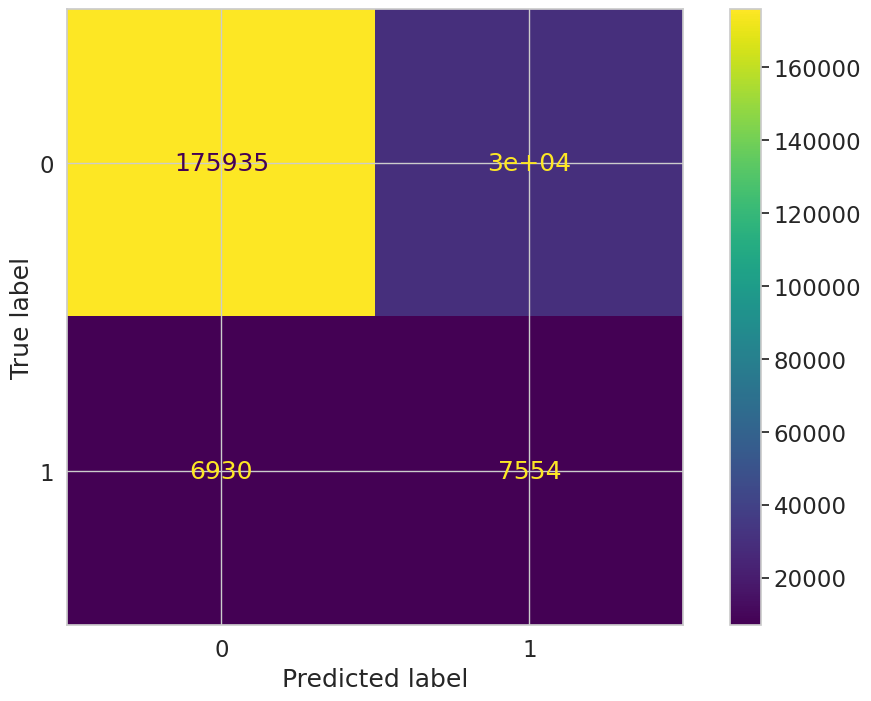

In [89]:
ConfusionMatrixDisplay.from_predictions(predictions['machine_status'].values,
                                        predictions['lof_anomaly'].values)
plt.show()

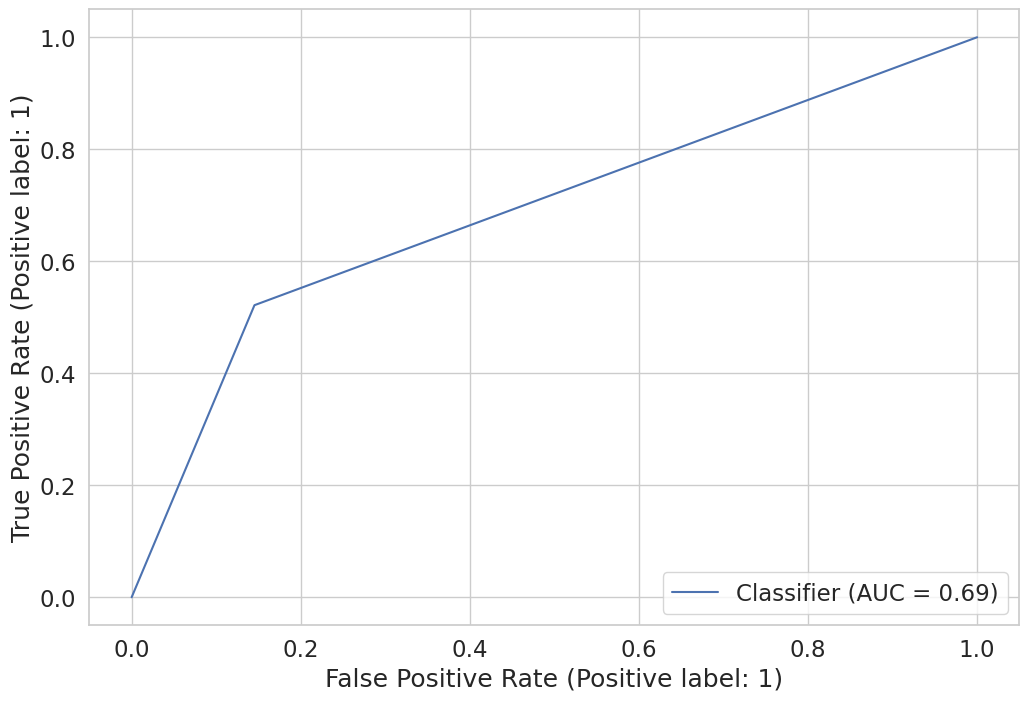

In [90]:
RocCurveDisplay.from_predictions(predictions['machine_status'], 
                                 predictions['lof_anomaly'])
plt.show()